<a href="https://colab.research.google.com/github/Joseph89155/Loan-Approval-Financial-Risk-Analysis-Python/blob/main/Loan_Approval_Financial_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project Plan

 1. Load the data
 2. Clean the data
 3. Explore the data (Main Question: Which Client profile is more likely to have an apploved loan)


## Loan Approval: Financial Risk Analysis

## Loading and Previewing the Data.

Dataset - [Financial Risk for Loan Approval](https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval)

In [ ]:
#Load Relevant libraries and the data
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [ ]:
#Previewing the top of the dataset
loans_data = pd.read_csv('/Loan.csv')
loans_data.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [ ]:
#Previewing the bottom of the dataset
loans_data.tail()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
19995,2072-09-29,44,30180,587,Employed,High School,19,24521,36,Married,...,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,0,55.0
19996,2072-09-30,56,49246,567,Employed,Associate,33,25818,36,Married,...,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,0,54.0
19997,2072-10-01,44,48958,645,Employed,Bachelor,20,37033,72,Married,...,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,0,45.0
19998,2072-10-02,60,41025,560,Employed,High School,36,14760,72,Married,...,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,0,59.0
19999,2072-10-03,20,53227,574,Employed,Associate,0,32055,48,Married,...,4435.583333,0.853801,5,41372,0.240055,0.242693,1049.830407,0.298006,0,59.0


#Cleaning the data

In [ ]:
#Check on the datatype.
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [ ]:
#Checking for missing values.
loans_data.isnull().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


In [ ]:
#Checking for Duplicates.
loans_data.duplicated().sum()

0

In [ ]:
# Converting the ApplicationDate column to datetype
loans_data['ApplicationDate'] = pd.to_datetime(loans_data['ApplicationDate'])

In [ ]:
# Checking on the data type of valious column
loans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   ApplicationDate             20000 non-null  datetime64[ns]
 1   Age                         20000 non-null  int64         
 2   AnnualIncome                20000 non-null  int64         
 3   CreditScore                 20000 non-null  int64         
 4   EmploymentStatus            20000 non-null  object        
 5   EducationLevel              20000 non-null  object        
 6   Experience                  20000 non-null  int64         
 7   LoanAmount                  20000 non-null  int64         
 8   LoanDuration                20000 non-null  int64         
 9   MaritalStatus               20000 non-null  object        
 10  NumberOfDependents          20000 non-null  int64         
 11  HomeOwnershipStatus         20000 non-null  object    

In [ ]:
# Columns of interest

# Define the columns you want to keep
columns_ = ['ApplicationDate', 'AnnualIncome', 'CreditScore',
                   'EmploymentStatus', 'LoanAmount', 'SavingsAccountBalance',
                   'TotalAssets', 'TotalLiabilities', 'JobTenure', 'HomeOwnershipStatus', 'LoanApproved']

# Create a new DataFrame with only the specified columns
loans = loans_data[columns_]

# Display the first few rows of the new DataFrame
loans.head()

,ApplicationDate,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,SavingsAccountBalance,TotalAssets,TotalLiabilities,JobTenure,HomeOwnershipStatus,LoanApproved
0,2018-01-01,39948,617,Employed,13152,7632,146111,19183,11,Own,0
1,2018-01-02,39709,628,Employed,26045,4627,53204,9595,3,Mortgage,0
2,2018-01-03,40724,570,Employed,17627,886,25176,128874,6,Rent,0
3,2018-01-04,69084,545,Employed,37898,1675,104822,5370,5,Mortgage,0
4,2018-01-05,103264,594,Employed,9184,1555,244305,17286,5,Mortgage,1


In [ ]:
# Check on shape
loans.shape

(20000, 11)

# Data Exploration and Visualizasion

In [ ]:
#Checking on the data points of interest
loans.columns

Index(['ApplicationDate', 'AnnualIncome', 'CreditScore', 'EmploymentStatus',
       'LoanAmount', 'SavingsAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'JobTenure', 'HomeOwnershipStatus', 'LoanApproved'],
      dtype='object')

# Application over Time.

In [ ]:
# Extract the year and month from the 'ApplicationDate'
loans['Year'] = loans['ApplicationDate'].dt.year
loans['Month'] = loans['ApplicationDate'].dt.to_period('M')

<ipython-input-39-727aa5f6f960>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans['Year'] = loans['ApplicationDate'].dt.year
<ipython-input-39-727aa5f6f960>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans['Month'] = loans['ApplicationDate'].dt.to_period('M')


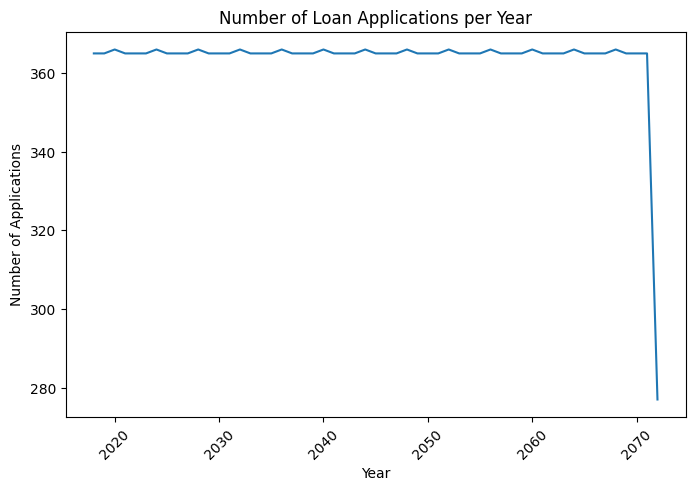

In [ ]:
# Group by year and count applications
applications_per_year = loans.groupby('Year').size()

# Plot the line graph for applications per year
plt.figure(figsize=(8, 5))
sb.lineplot(x=applications_per_year.index, y=applications_per_year.values)
plt.title('Number of Loan Applications per Year')
plt.xlabel('Year')
plt.ylabel('Number of Applications')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.show()

### Annual Income.

In [ ]:
##AnnualIncome
#ApplicationDate
#EmploymentStatus
#LoanAmount
#HomeOwnershipStatus
#LoanApproved

# Measures of Central Tendency
mean_ai = round(loans['AnnualIncome'].mean(),2)
median_ai = round(loans['AnnualIncome'].median(),2)
mode_ai = round(loans['AnnualIncome'].mode(),2)
percentile_25_ai = round(loans['AnnualIncome'].quantile(0.25),2)
percentile_75_ai = round(loans['AnnualIncome'].quantile(0.75),2)

# Print the results
print("Mean=", mean_ai)
print("Median=", median_ai)
print("Mode=", mode_ai)
print("25th Percentile=", percentile_25_ai)
print("75th Percentile=", percentile_75_ai)


Mean= 59161.47
Median= 48566.0
Mode= 0    15000
Name: AnnualIncome, dtype: int64
25th Percentile= 31679.0
75th Percentile= 74391.0


In [ ]:
# Majority of the clients who get their loans approved are at what income level?

# Define the function that will categorize income levels
def result(AnnualIncome):
  if AnnualIncome <= percentile_25_ai:
    return f'<= {percentile_25_ai}'
  elif AnnualIncome <= mean_ai:
    return f'<= {mean_ai}'
  elif AnnualIncome <= percentile_75_ai:
    return f'<= {percentile_75_ai}'
  else:
    return f'> {percentile_75_ai}'

# Appling the function to our dataset
loans['Income Category'] = loans['AnnualIncome'].apply(result)
loans.head()


<ipython-input-25-548754228e31>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans['Income Category'] = loans['AnnualIncome'].apply(result)


,ApplicationDate,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,SavingsAccountBalance,TotalAssets,TotalLiabilities,JobTenure,HomeOwnershipStatus,LoanApproved,AnnualIncome_Category,Income Category
0,2018-01-01,39948,617,Employed,13152,7632,146111,19183,11,Own,0,<= 59161.47,<= 59161.47
1,2018-01-02,39709,628,Employed,26045,4627,53204,9595,3,Mortgage,0,<= 59161.47,<= 59161.47
2,2018-01-03,40724,570,Employed,17627,886,25176,128874,6,Rent,0,<= 59161.47,<= 59161.47
3,2018-01-04,69084,545,Employed,37898,1675,104822,5370,5,Mortgage,0,<= 74391.0,<= 74391.0
4,2018-01-05,103264,594,Employed,9184,1555,244305,17286,5,Mortgage,1,> 74391.0,> 74391.0


In [ ]:
# Select unique Income Ctegory
loans['Income Category'].unique()

array(['<= 59161.47', '<= 74391.0', '> 74391.0', '<= 31679.0'],
      dtype=object)

In [ ]:
# Grouping by 'Income Category' and counting the number of people in each category
applicants_by_category = loans.groupby('Income Category').size().sort_values(ascending=True).head()
applicants_by_category

,0
Income Category,
<= 74391.0,2478
<= 31679.0,5000
> 74391.0,5000
<= 59161.47,7522


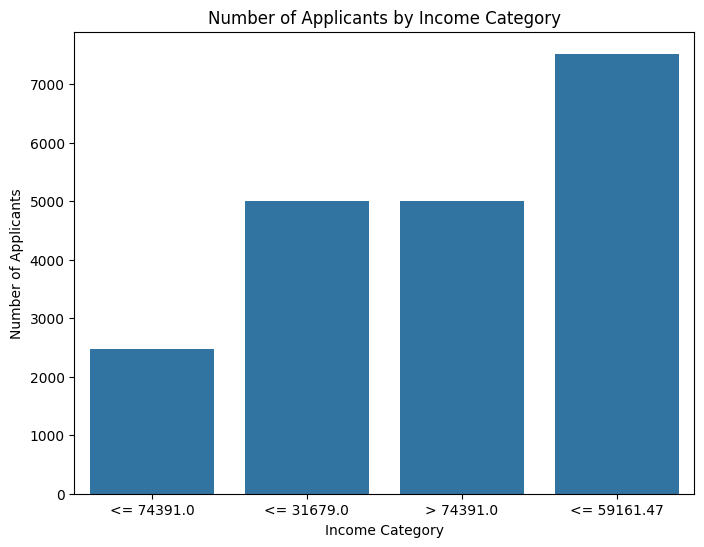

In [ ]:
# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))
base_color = sb.color_palette()[0]

# Create a bar plot using seaborn
sb.barplot(x=applicants_by_category.index, y=applicants_by_category.values, color=base_color)

# Add labels and title
plt.title('Number of Applicants by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Number of Applicants')

# Show the plot
plt.show()

The majority of the applications are from medium lower earners

In [ ]:
# Filter the loans where LoanApploved is 1
approved_loans = loans[loans['LoanApproved'] == 1]
applicants_by_category = approved_loans.groupby('Income Category').size().sort_values(ascending=False).head()
print(applicants_by_category)

Income Category
> 74391.0      3223
<= 59161.47     771
<= 74391.0      734
<= 31679.0       52
dtype: int64


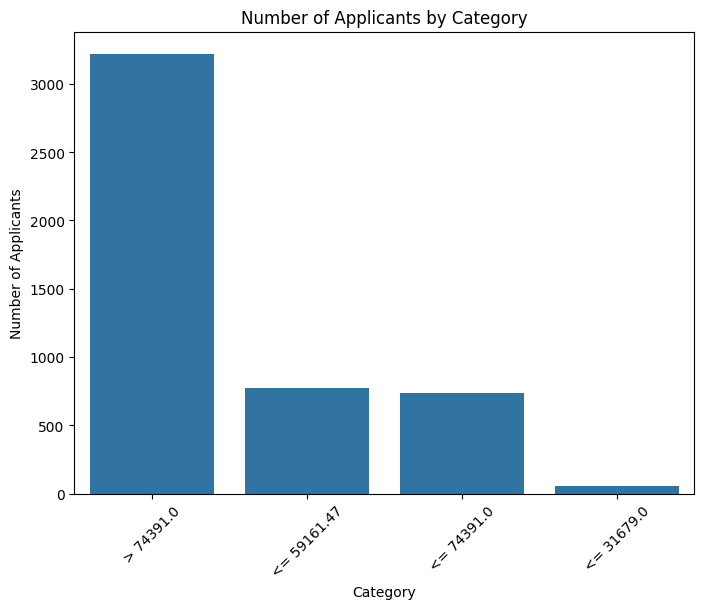

In [ ]:
# Create a bar plot using seaborn.
plt.figure(figsize=(8, 6))
base_color = sb.color_palette()[0]

# Create a bar plot using
sb.barplot(x=applicants_by_category.index, y=applicants_by_category.values, color=base_color)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Number of Applicants')
plt.title('Number of Applicants by Category')
plt.xticks(rotation=45)

# Show the plot
plt.show()

The category with the list approved applications, are the lower earners; defined as anyone who earns below USD 31,679 per year.

### Savings Account Balance

In [ ]:
##SavingsAccountBalance
#ApplicationDate
#EmploymentStatus
#LoanAmount
#HomeOwnershipStatus
#LoanApproved

# Measures of Central Tendency
mean_ai = round(loans['SavingsAccountBalance'].mean(),2)
median_ai = round(loans['SavingsAccountBalance'].median(),2)
mode_ai = round(loans['SavingsAccountBalance'].mode(),2)
percentile_25_ai = round(loans['SavingsAccountBalance'].quantile(0.25),2)
percentile_75_ai = round(loans['SavingsAccountBalance'].quantile(0.75),2)

# Print the results
print("Mean=", mean_ai)
print("Median=", median_ai)
print("Mode=", mode_ai)
print("25th Percentile=", percentile_25_ai)
print("75th Percentile=", percentile_75_ai)

Mean= 4946.05
Median= 2986.0
Mode= 0    1165
Name: SavingsAccountBalance, dtype: int64
25th Percentile= 1541.75
75th Percentile= 5873.25


In [ ]:
# Majority of the clients who get their loans approved are at what Savings Account Balance level?

# Define the function that will categorize Savings Account Balance levels
def result(SavingsAccountBalance):
  if SavingsAccountBalance <= percentile_25_ai:
    return f'<= {percentile_25_ai}'
  elif SavingsAccountBalance <= mean_ai:
    return f'<= {mean_ai}'
  elif SavingsAccountBalance <= percentile_75_ai:
    return f'<= {percentile_75_ai}'
  else:
    return f'> {percentile_75_ai}'

# Applying the function to our dataset
loans['SavingsAccountBalance Category'] = loans['SavingsAccountBalance'].apply(result)
loans.head()

<ipython-input-42-28c9fb018af5>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans['SavingsAccountBalance Category'] = loans['SavingsAccountBalance'].apply(result)


,ApplicationDate,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,SavingsAccountBalance,TotalAssets,TotalLiabilities,JobTenure,HomeOwnershipStatus,LoanApproved,AnnualIncome_Category,Income Category,Year,Month,SavingsAccountBalance Category
0,2018-01-01,39948,617,Employed,13152,7632,146111,19183,11,Own,0,<= 59161.47,<= 59161.47,2018,2018-01,> 5873.25
1,2018-01-02,39709,628,Employed,26045,4627,53204,9595,3,Mortgage,0,<= 59161.47,<= 59161.47,2018,2018-01,<= 4946.05
2,2018-01-03,40724,570,Employed,17627,886,25176,128874,6,Rent,0,<= 59161.47,<= 59161.47,2018,2018-01,<= 1541.75
3,2018-01-04,69084,545,Employed,37898,1675,104822,5370,5,Mortgage,0,<= 74391.0,<= 74391.0,2018,2018-01,<= 4946.05
4,2018-01-05,103264,594,Employed,9184,1555,244305,17286,5,Mortgage,1,> 74391.0,> 74391.0,2018,2018-01,<= 4946.05


In [ ]:
# Select unique SavingsAccountBalance Category
loans['SavingsAccountBalance Category'].unique()

array(['> 5873.25', '<= 4946.05', '<= 1541.75', '<= 5873.25'],
      dtype=object)

In [ ]:
# Grouping by 'SavingsAccountBalance Category' and counting the number of people in each category
applicants_by_category = loans.groupby('SavingsAccountBalance Category').size().sort_values(ascending=True).head()
applicants_by_category

,0
SavingsAccountBalance Category,
<= 5873.25,1120
<= 1541.75,5000
> 5873.25,5000
<= 4946.05,8880


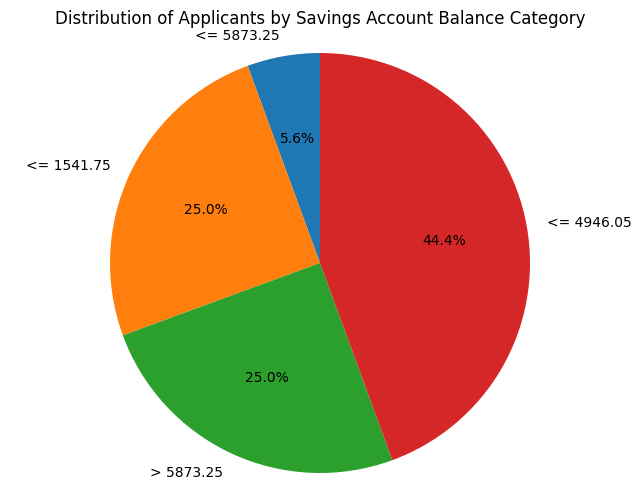

In [ ]:
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(applicants_by_category.values, labels=applicants_by_category.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Applicants by Savings Account Balance Category')

# Ensure the circle's proportion
plt.axis('equal')

# Show the plot
plt.show()

In [ ]:
# Filter the loans where LoanApploved is 1
approved_loans = loans[loans['LoanApproved'] == 1]
applicants_by_category = approved_loans.groupby('SavingsAccountBalance Category').size().sort_values(ascending=False).head()
print(applicants_by_category)

SavingsAccountBalance Category
<= 4946.05    2159
> 5873.25     1210
<= 1541.75    1140
<= 5873.25     271
dtype: int64


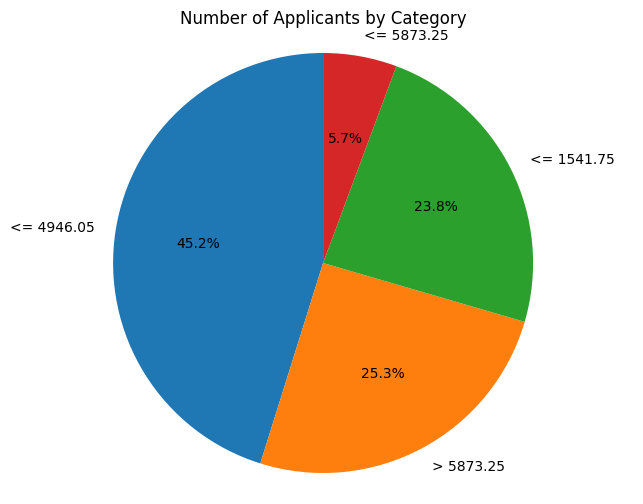

In [ ]:
# Create a pie chart using matplotlib.pyplot
plt.figure(figsize=(8, 6))  # Set the figure size

# Create the pie chart
plt.pie(applicants_by_category.values,
        labels=applicants_by_category.index,
        autopct='%1.1f%%',  # Display percentages with one decimal place
        startangle=90)  # Start the first slice at 90 degrees (top)

# Add a title
plt.title('Number of Applicants by Category')

# Ensure the circle's proportion (make it a true circle)
plt.axis('equal')

# Show the plot
plt.show()

### Credit Score.

In [ ]:
##CreditScore
#ApplicationDate
#EmploymentStatus
#LoanAmount
#HomeOwnershipStatus
#LoanApproved

# Measures of Central Tendency
mean_ai = round(loans['CreditScore'].mean(),2)
median_ai = round(loans['CreditScore'].median(),2)
mode_ai = round(loans['CreditScore'].mode(),2)
percentile_25_ai = round(loans['CreditScore'].quantile(0.25),2)
percentile_75_ai = round(loans['CreditScore'].quantile(0.75),2)

# Print the results
print("Mean=", mean_ai)
print("Median=", median_ai)
print("Mode=", mode_ai)
print("25th Percentile=", percentile_25_ai)
print("75th Percentile=", percentile_75_ai)

Mean= 571.61
Median= 578.0
Mode= 0    609
Name: CreditScore, dtype: int64
25th Percentile= 540.0
75th Percentile= 609.0


In [ ]:
# Majority of the clients who get their loans approved are at what Credit Score level?

# Define the function that will categorize Credit Score levels
def result(CreditScore):
  if CreditScore <= percentile_25_ai:
    return f'<= {percentile_25_ai}'
  elif CreditScore <= mean_ai:
    return f'<= {mean_ai}'
  elif CreditScore <= percentile_75_ai:
    return f'<= {percentile_75_ai}'
  else:
    return f'> {percentile_75_ai}'

# Applying the function to our dataset
loans['CreditScore Category'] = loans['CreditScore'].apply(result)
loans.head()


<ipython-input-50-06d671e4b3b2>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans['CreditScore Category'] = loans['CreditScore'].apply(result)  # Changed column name


,ApplicationDate,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,SavingsAccountBalance,TotalAssets,TotalLiabilities,JobTenure,HomeOwnershipStatus,LoanApproved,AnnualIncome_Category,Income Category,Year,Month,SavingsAccountBalance Category,CreditScore Category
0,2018-01-01,39948,617,Employed,13152,7632,146111,19183,11,Own,0,<= 59161.47,<= 59161.47,2018,2018-01,> 5873.25,> 609.0
1,2018-01-02,39709,628,Employed,26045,4627,53204,9595,3,Mortgage,0,<= 59161.47,<= 59161.47,2018,2018-01,<= 4946.05,> 609.0
2,2018-01-03,40724,570,Employed,17627,886,25176,128874,6,Rent,0,<= 59161.47,<= 59161.47,2018,2018-01,<= 1541.75,<= 571.61
3,2018-01-04,69084,545,Employed,37898,1675,104822,5370,5,Mortgage,0,<= 74391.0,<= 74391.0,2018,2018-01,<= 4946.05,<= 571.61
4,2018-01-05,103264,594,Employed,9184,1555,244305,17286,5,Mortgage,1,> 74391.0,> 74391.0,2018,2018-01,<= 4946.05,<= 609.0


In [ ]:
# Select unique CreditScore Category
loans['CreditScore Category'].unique()

array(['> 609.0', '<= 571.61', '<= 609.0', '<= 540.0'], dtype=object)

In [ ]:
# Grouping by 'CreditScore Category' and counting the number of people in each category
applicants_by_category = loans.groupby('CreditScore Category').size().sort_values(ascending=True).head()
applicants_by_category

,0
CreditScore Category,
<= 571.61,3946
> 609.0,4830
<= 540.0,5021
<= 609.0,6203


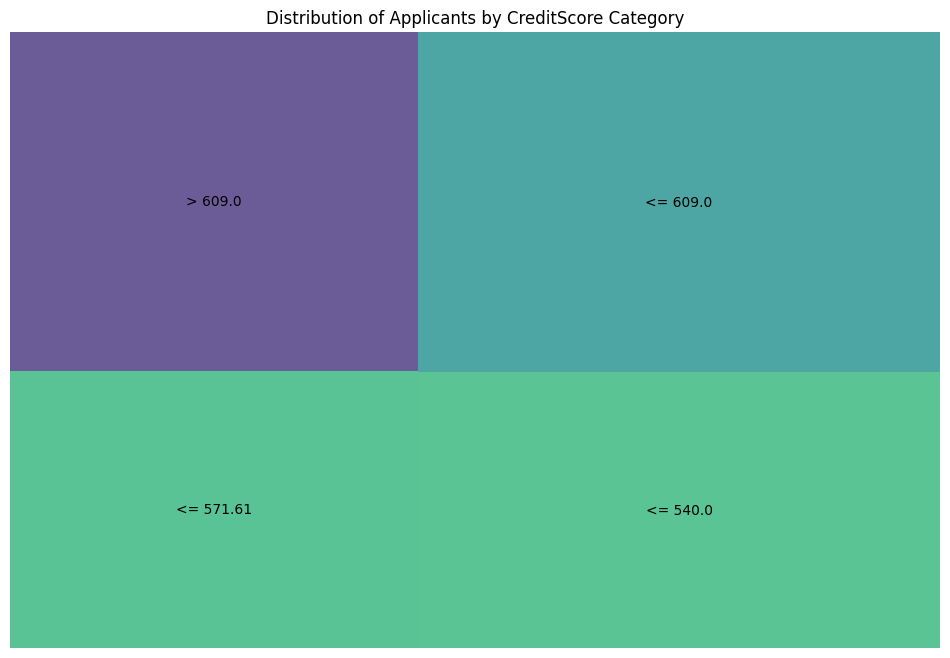

In [ ]:
!pip install squarify
import squarify # Importing the squarify library for creating treemaps

# Create a treemap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
squarify.plot(sizes=applicants_by_category.values,
              label=applicants_by_category.index,
              alpha=.8 )  # Adjust transparency as needed
plt.title('Distribution of Applicants by CreditScore Category')
plt.axis('off')  # Remove axes
plt.show()

In [ ]:
# Filter the loans where LoanApploved is 1
approved_loans = loans[loans['LoanApproved'] == 1]
applicants_by_category = approved_loans.groupby('CreditScore Category').size().sort_values(ascending=False).head()
print(applicants_by_category)

CreditScore Category
> 609.0      1606
<= 609.0     1482
<= 540.0      874
<= 571.61     818
dtype: int64


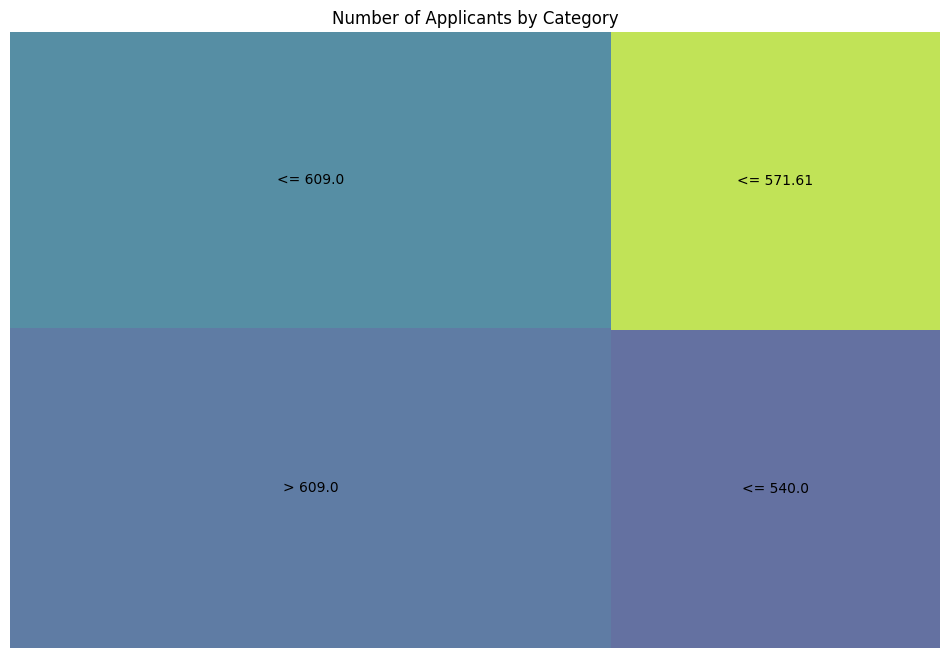

In [ ]:
import squarify # Importing the squarify library

# Create a treemap
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
squarify.plot(sizes=applicants_by_category.values,
              label=applicants_by_category.index,
              alpha=.8 )  # Adjust transparency as needed
plt.title('Number of Applicants by Category')
plt.axis('off')  # Remove axes
plt.show()

### Job Tenure

In [ ]:
#JobTenure
#ApplicationDate
#EmploymentStatus
#LoanAmount
#HomeOwnershipStatus
#LoanApproved

# Measures of Central Tendency
mean_ai = round(loans['JobTenure'].mean(),2)
median_ai = round(loans['JobTenure'].median(),2)
mode_ai = round(loans['JobTenure'].mode(),2)
percentile_25_ai = round(loans['JobTenure'].quantile(0.25),2)
percentile_75_ai = round(loans['JobTenure'].quantile(0.75),2)

# Print the results
print('Mean = '+str(mean_ai))
print('Median = '+str(median_ai))
print('Mode = '+str(mode_ai))
print('percentile_25 = '+str(percentile_25_ai))
print('percentile_75 = '+str(percentile_75_ai))

Mean = 5.0
Median = 5.0
Mode = 0    4
Name: JobTenure, dtype: int64
percentile_25 = 3.0
percentile_75 = 6.0


In [ ]:
#Majority of the clients who get their loans approved are at what Job Tenure level?

# Defining the function that will categorize Job Tenure levels

def result(JobTenure):
  if JobTenure <= percentile_25_ai:
    return f'<= {percentile_25_ai}'
  elif JobTenure <= mean_ai:
    return f'<= {mean_ai}'
  elif JobTenure <= percentile_75_ai:
    return f'<= {percentile_75_ai}'
  else:
    return f'> {percentile_75_ai}'

#Applying the function to our dataset
loans['JobTenure Category'] = loans['JobTenure'].apply(result)
loans.head()

<ipython-input-61-c38b2b78450b>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loans['JobTenure Category'] = loans['JobTenure'].apply(result)


,ApplicationDate,AnnualIncome,CreditScore,EmploymentStatus,LoanAmount,SavingsAccountBalance,TotalAssets,TotalLiabilities,JobTenure,HomeOwnershipStatus,LoanApproved,AnnualIncome_Category,Income Category,Year,Month,SavingsAccountBalance Category,CreditScore Category,JobTenure Category
0,2018-01-01,39948,617,Employed,13152,7632,146111,19183,11,Own,0,<= 59161.47,<= 59161.47,2018,2018-01,> 5873.25,> 609.0,> 6.0
1,2018-01-02,39709,628,Employed,26045,4627,53204,9595,3,Mortgage,0,<= 59161.47,<= 59161.47,2018,2018-01,<= 4946.05,> 609.0,<= 3.0
2,2018-01-03,40724,570,Employed,17627,886,25176,128874,6,Rent,0,<= 59161.47,<= 59161.47,2018,2018-01,<= 1541.75,<= 571.61,<= 6.0
3,2018-01-04,69084,545,Employed,37898,1675,104822,5370,5,Mortgage,0,<= 74391.0,<= 74391.0,2018,2018-01,<= 4946.05,<= 571.61,<= 5.0
4,2018-01-05,103264,594,Employed,9184,1555,244305,17286,5,Mortgage,1,> 74391.0,> 74391.0,2018,2018-01,<= 4946.05,<= 609.0,<= 5.0


In [ ]:
#Select unique Income Category
loans['JobTenure Category'].unique()

array(['> 6.0', '<= 3.0', '<= 6.0', '<= 5.0'], dtype=object)

In [ ]:
# Grouping by 'Income Category' and counting the number of people in each category
applicants_by_category = loans.groupby('JobTenure Category').size().sort_values(ascending=False).head()
applicants_by_category

,0
JobTenure Category,
<= 5.0,7137
<= 3.0,5238
> 6.0,4790
<= 6.0,2835


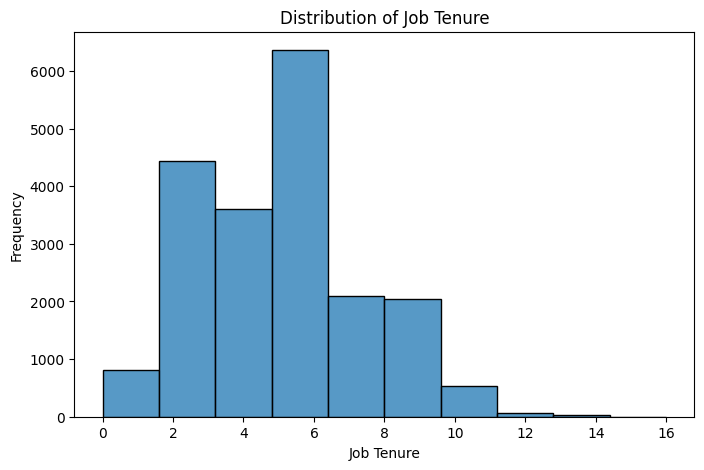

In [ ]:
# Create a histogram using seaborn
plt.figure(figsize=(8, 5))

# Create the histogram
sb.histplot(data=loans, x='JobTenure', bins=10, color=base_color)

# Add labels and title
plt.xlabel('Job Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Job Tenure')

# Show the plot
plt.show()

In [ ]:
# Filter the loans where LoanApproved is 1
# loans_approved = [loans['LoanApproved'] == 1]
loans_approved = loans[loans['LoanApproved'] == 1]
#applicants_by_category = loans_approved.groupby('Income Category').size().sort_values(ascending=False).head()

approvedApplicants_by_category = loans_approved.groupby('JobTenure Category').size().sort_values(ascending=False).head()
print(approvedApplicants_by_category)

JobTenure Category
<= 5.0    1748
<= 3.0    1221
> 6.0     1170
<= 6.0     641
dtype: int64


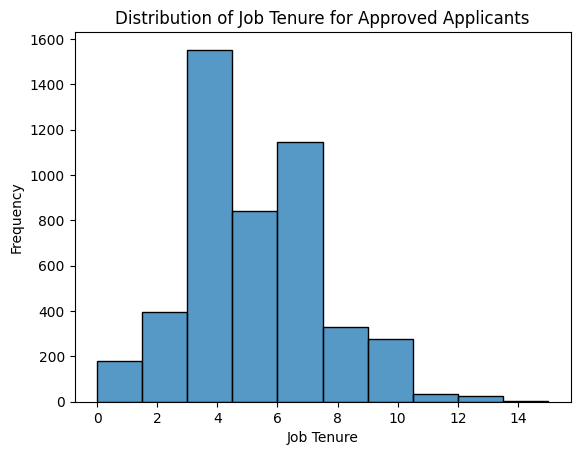

In [ ]:
# Create a histogram using seaborn
sb.histplot(data=loans_approved, x='JobTenure', bins=10, color=base_color)

# Add labels and title
plt.xlabel('Job Tenure')
plt.ylabel('Frequency')
plt.title('Distribution of Job Tenure for Approved Applicants')

# Show the plot
plt.show()